# ИД23-1 Маслов АН

# Dask DataFrame

Материалы:
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* JESSE C. DANIEL. Data Science with Python and Dask.

## Задачи для совместного разбора

In [1]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [3]:
#from google.colab import files
#f1 = files.upload()
#nf = list(f1.keys())  # имя загруженного файла
nf = ["accounts.0.csv","accounts.1.csv","accounts.2.csv"]
accounts = dd.read_csv(nf)
accounts.head(5)

,id,names,amount
0,39,Victor,205
1,289,Hannah,87
2,234,Victor,1820
3,155,Ray,-600
4,266,Ray,572


In [ ]:
accounts.isnull().agg('count').compute()

AttributeError: 'DataFrame' object has no attribute 'agg'

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

## Лабораторная работа 13

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [ ]:
from google.colab import files
f1 = files.upload()
nf = list(f1.keys())[0]  # имя загруженного файла
recipes = dd.read_csv(nf,  parse_dates=['submitted'])

Saving recipes_sample.csv to recipes_sample.csv


2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [ ]:

print("Метаинформация о таблице: ")
print(recipes.info())

Метаинформация о таблице: 
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 8 entries, name to n_ingredients
dtypes: datetime64[ns](1), float64(2), int64(3), string(2)None


3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [ ]:
recipes.head(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [ ]:
recipes.tail(5)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN
29999,cookies by design cookies on a stick,298512,29,506822,2008-04-15,9.0,"i've heard of the 'cookies by design' company,...",10.0


4. Посчитайте, сколько строк содержит каждый из блоков

In [ ]:
recipes.map_partitions(lambda x: x).map_partitions(lambda recipes: recipes.shape[0]).compute()

,0
0,30000


5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` в этом случае.

Максимум в столбце n_steps: 88.0



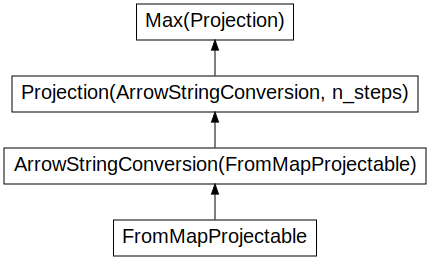

In [ ]:
print("Максимум в столбце n_steps: " + str(recipes['n_steps'].max().compute()))
print()
recipes['n_steps'].max().visualize()

6. Посчитайте количество отзывов с группировкой по месяцам добавления отзыва в базу.

In [ ]:
#подсчёт количества рецептов с группировкой по месяцу и сортировку по месяцам
recipes_count = recipes['name'].groupby([recipes.submitted.dt.month]).agg('count').compute().sort_index()
recipes_count


,name
submitted,
1,2628
2,2420
3,2667
4,2689
5,2853
6,2366
7,2447
8,2457
9,2423


7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [ ]:
f1 = files.upload()
nf = list(f1.keys())[0]  # имя загруженного файла
reviews = db.read_text(nf).map(lambda x: x.split(','))

In [ ]:
#подсчёт среднего значения рейтинга с группировкой по месяцам, округлением до 2 знаков после запятой и сортировка по месяцам
mean_rating = reviews['rating'].groupby([reviews.date.dt.month]).agg('mean').compute().round(2).sort_index()
mean_rating

,rating
date,
1,4.41
2,4.39
3,4.37
4,4.43
5,4.45
6,4.44
7,4.41
8,4.43
9,4.41


8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [ ]:
#конкатенация двух таблиц и изменение названий колонок
df = pd.concat([mean_rating, recipes_count], axis=1).rename(columns = {'rating' : 'mean_rating', 'name':'recipes_count'})
df

,mean_rating,recipes_count
1,4.41,2628
2,4.39,2420
3,4.37,2667
4,4.43,2689
5,4.45,2853
6,4.44,2366
7,4.41,2447
8,4.43,2457
9,4.41,2423
10,4.43,2472
